In [3]:
import os
from arcgis.gis import GIS
import keyring
import arcgis.network as network
from arcgis.features import FeatureLayer, Feature, FeatureSet, use_proximity, FeatureCollection
import pandas as pd
import time
import datetime as dt
import geopandas as gpd

<User username:angelzyt_UPenn>
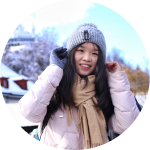

In [2]:
pw = keyring.get_password("system", "angelzyt_UPenn") #Enter your username 
my_gis = GIS(url="https://arcgis.com/", username='angelzyt_UPenn', password=pw)
my_gis.users.me

In [26]:
random_points_gdf = gpd.read_file('/Users/angel_zhong/Library/CloudStorage/OneDrive-PennO365/Green Space/output-shp/countyrandompoint2/CountyRandomPoint2.shp')
park_points_gdf = gpd.read_file('/Users/angel_zhong/Documents/GitHub/park-network-distance/data/parkPoint/park3_FeatureToPoint.shp')
county_gdf = gpd.read_file('/Users/angel_zhong/Documents/GitHub/park-network-distance/data/tl_2020_us_county/tl_2020_us_county.shp')

In [28]:
target_crs = 'EPSG:4326'

if random_points_gdf.crs != target_crs:
    random_points_gdf = random_points_gdf.to_crs(target_crs)

if park_points_gdf.crs != target_crs:
    park_points_gdf = park_points_gdf.to_crs(target_crs)

if county_gdf.crs != target_crs:
    county_gdf = county_gdf.to_crs(target_crs)

In [29]:
random_points_with_county = gpd.sjoin(random_points_gdf, county_gdf, op='within')
park_points_with_county = gpd.sjoin(park_points_gdf, county_gdf, op='within')

/Users/angel_zhong/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/Users/angel_zhong/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [30]:
print(f"random_points_with_county: {len(random_points_with_county)}")
print(f"park_points_with_county: {len(park_points_with_county)}")
print(f"county_gdf: {len(county_gdf)}")

random_points_with_county: 20141
park_points_with_county: 135076
county_gdf: 3234


In [63]:
random_points_gdf.head(1)


,CID,geometry
0,0,POINT (-86.57891 32.50717)


In [33]:
random_points_with_county.head(2)

,CID,geometry,index_right,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
0,0,POINT (-86.57891 32.50717),1327,01,001,00161526,01001,Autauga,Autauga County,06,H1,G4020,388,33860,None,A,1539634184,25674812,+32.5322367,-086.6464395
1,0,POINT (-86.53029 32.52936),1327,01,001,00161526,01001,Autauga,Autauga County,06,H1,G4020,388,33860,None,A,1539634184,25674812,+32.5322367,-086.6464395


In [11]:
park_points_with_county.head(2)

,objectid,park_id,park_name,park_zip,park_count,ORIG_FID,geometry,index_right,STATEFP,COUNTYFP,...,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
0,133973.0,2146027-0132,GAINESWAY 03,40517.0,Fayette County,0,POINT (-84.48211 37.98983),1187,21,067,...,H6,G4020,336,30460,None,C,734617508,4920615,+38.0406777,-084.4582721
472,83522.0,2146027-0049,Berry Hill Park,40515.0,Fayette County,472,POINT (-84.46062 37.97688),1187,21,067,...,H6,G4020,336,30460,None,C,734617508,4920615,+38.0406777,-084.4582721


In [35]:
random_points_with_county['STATEFP'].unique()

array(['01', '04', '05', '28', '06', '08', '09', '10', '11', '12', '13',
       '16', '17', '18', '19', '20', '21', '22', '48', '23', '24', '25',
       '26', '27', '29', '30', '31', '32', '33', '34', '35', '36', '37',
       '38', '39', '40', '41', '42', '44', '45', '46', '47', '49', '50',
       '51', '53', '54', '55', '56'], dtype=object)

In [36]:
import random
random_counties = county_gdf.sample(n=1)
random_counties

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
1073,20,177,00485051,20177,Shawnee,Shawnee County,06,H1,G4020,None,45820,None,A,1409020132,30313507,+39.0418053,-095.7556640,"POLYGON ((-95.94675 39.09868, -95.94878 39.098..."


In [37]:
state_name = random_counties.iloc[0,0]
state_name

'20'

In [38]:
# Get the index of the randomly selected state
state_name = random_counties.iloc[0,0]

# Filter park_points_with_county and random_points_with_county for the randomly selected county
selected_park_points = park_points_with_county[park_points_with_county['STATEFP'] == state_name]
selected_random_points = random_points_with_county[random_points_with_county['STATEFP'] == state_name]

# Display the selected rows
print("Selected park points:")
print(len(selected_park_points))
print("\nSelected random points:")
print(len(selected_random_points))

Selected park points:
1364

Selected random points:
700


In [54]:
from arcgis.features import Feature, FeatureSet

def gdf_to_featureset(gdf):
    gdf.reset_index(inplace=True, drop=True)
    features = []
    for idx, row in gdf.iterrows():
        feature = Feature(geometry=row['geometry'].__geo_interface__)
        attributes = row.drop('geometry').to_dict()
        feature.attributes = attributes
        features.append(feature)
    return FeatureSet(features)

selected_random_points_featureset = gdf_to_featureset(selected_random_points)
selected_park_points_featureset = gdf_to_featureset(selected_park_points)


In [55]:
selected_random_points_featureset

<FeatureSet> 700 features

In [57]:
print(selected_random_points_featureset.to_dict())
print(selected_park_points_featureset.to_dict())


{'features': [{'geometry': {'type': 'Point', 'coordinates': (-95.37258029267005, 38.033702715074)}, 'attributes': {'CID': 854, 'index_right': 797, 'STATEFP': '20', 'COUNTYFP': '001', 'COUNTYNS': '00484970', 'GEOID': '20001', 'NAME': 'Allen', 'NAMELSAD': 'Allen County', 'LSAD': '06', 'CLASSFP': 'H1', 'MTFCC': 'G4020', 'CSAFP': None, 'CBSAFP': None, 'METDIVFP': None, 'FUNCSTAT': 'A', 'ALAND': 1295764235, 'AWATER': 13021929, 'INTPTLAT': '+37.8842285', 'INTPTLON': '-095.3009448', 'OBJECTID': 1}}, {'geometry': {'type': 'Point', 'coordinates': (-95.3465699288864, 37.784064457889386)}, 'attributes': {'CID': 854, 'index_right': 797, 'STATEFP': '20', 'COUNTYFP': '001', 'COUNTYNS': '00484970', 'GEOID': '20001', 'NAME': 'Allen', 'NAMELSAD': 'Allen County', 'LSAD': '06', 'CLASSFP': 'H1', 'MTFCC': 'G4020', 'CSAFP': None, 'CBSAFP': None, 'METDIVFP': None, 'FUNCSTAT': 'A', 'ALAND': 1295764235, 'AWATER': 13021929, 'INTPTLAT': '+37.8842285', 'INTPTLON': '-095.3009448', 'OBJECTID': 2}}, {'geometry': {'t

In [60]:
print(selected_random_points_featureset.to_dict())
print(selected_park_points_featureset.to_dict())

{'features': [{'geometry': {'type': 'Point', 'coordinates': (-95.37258029267005, 38.033702715074)}, 'attributes': {'CID': 854, 'index_right': 797, 'STATEFP': '20', 'COUNTYFP': '001', 'COUNTYNS': '00484970', 'GEOID': '20001', 'NAME': 'Allen', 'NAMELSAD': 'Allen County', 'LSAD': '06', 'CLASSFP': 'H1', 'MTFCC': 'G4020', 'CSAFP': None, 'CBSAFP': None, 'METDIVFP': None, 'FUNCSTAT': 'A', 'ALAND': 1295764235, 'AWATER': 13021929, 'INTPTLAT': '+37.8842285', 'INTPTLON': '-095.3009448', 'OBJECTID': 1}}, {'geometry': {'type': 'Point', 'coordinates': (-95.3465699288864, 37.784064457889386)}, 'attributes': {'CID': 854, 'index_right': 797, 'STATEFP': '20', 'COUNTYFP': '001', 'COUNTYNS': '00484970', 'GEOID': '20001', 'NAME': 'Allen', 'NAMELSAD': 'Allen County', 'LSAD': '06', 'CLASSFP': 'H1', 'MTFCC': 'G4020', 'CSAFP': None, 'CBSAFP': None, 'METDIVFP': None, 'FUNCSTAT': 'A', 'ALAND': 1295764235, 'AWATER': 13021929, 'INTPTLAT': '+37.8842285', 'INTPTLON': '-095.3009448', 'OBJECTID': 2}}, {'geometry': {'t

In [ ]:
elected_random_points_featureset = selected_random_points_featureset.features[:10]

In [62]:
selected_park_points_featureset.features[:10]

[{"geometry": {"type": "Point", "coordinates": [-94.67441552485973, 38.51012505175523]}, "attributes": {"objectid": 99859.0, "park_id": "2042875-0006", "park_name": "Middle Creek Lake Park", "park_zip": 66053.0, "park_count": "Miami County", "ORIG_FID": 30, "index_right": 1328, "STATEFP": "20", "COUNTYFP": "121", "COUNTYNS": "00485025", "GEOID": "20121", "NAME": "Miami", "NAMELSAD": "Miami County", "LSAD": "06", "CLASSFP": "H1", "MTFCC": "G4020", "CSAFP": "312", "CBSAFP": "28140", "METDIVFP": null, "FUNCSTAT": "A", "ALAND": 1491519067, "AWATER": 37235270, "INTPTLAT": "+38.5667718", "INTPTLON": "-094.8329626"}},
 {"geometry": {"type": "Point", "coordinates": [-94.67772048829734, 38.617271074996786]}, "attributes": {"objectid": 99854.0, "park_id": "2042875-0001", "park_name": "City Park", "park_zip": 66053.0, "park_count": "Miami County", "ORIG_FID": 11369, "index_right": 1328, "STATEFP": "20", "COUNTYFP": "121", "COUNTYNS": "00485025", "GEOID": "20121", "NAME": "Miami", "NAMELSAD": "Mia

In [58]:
sampled_random_points_featureset = FeatureSet(selected_random_points_featureset.features[:10])
sampled_park_points_featureset = FeatureSet(selected_park_points_featureset.features[:10])

result1 = network.analysis.find_closest_facilities(
    incidents=sampled_random_points_featureset,
    facilities=sampled_park_points_featureset,
    measurement_units='Minutes',
    time_of_day=dt.datetime.now(),
    number_of_facilities_to_find=1,
    save_output_network_analysis_layer=True,
    gis=my_gis
)


ERROR 030125: Insufficient input. Need at least one facility and one incident.
Failed to execute (FindClosestFacilities).
Failed.


Exception: Job failed.

In [56]:
%%time
current_time = dt.datetime.now()  
result1 = network.analysis.find_closest_facilities(incidents=selected_random_points_featureset, facilities=selected_park_points_featureset,
                                                   measurement_units = 'Minutes',
                                                   time_of_day=current_time, 
                                                   number_of_facilities_to_find=1,
                                                   save_output_network_analysis_layer=True,
                                                   gis=my_gis)

Invalid value for parameter Incidents - Details : Invalid JSON for GPFeatureRecordSetLayer or GPRecordSet datatype 
Failed.


Exception: Job failed.

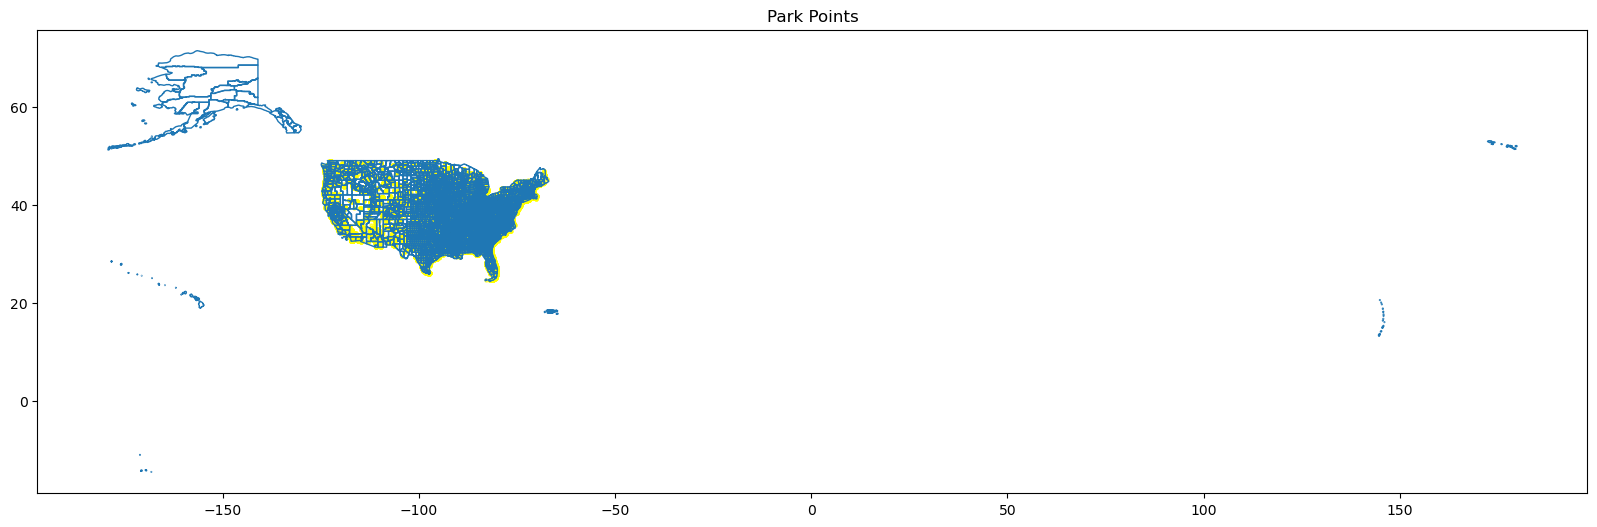

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Convert park_points_with_county DataFrame to GeoDataFrame
gdf_park_points = gpd.GeoDataFrame(park_points_with_county, geometry='geometry', crs="EPSG:4326")

# Plot the map
fig, ax = plt.subplots(figsize=(20, 20))
county_gdf.boundary.plot(ax=ax, linewidth=1)
gdf_park_points.plot(ax=ax, markersize=5, color='yellow', alpha=0.6)
ax.set_title('Park Points')
plt.show()
